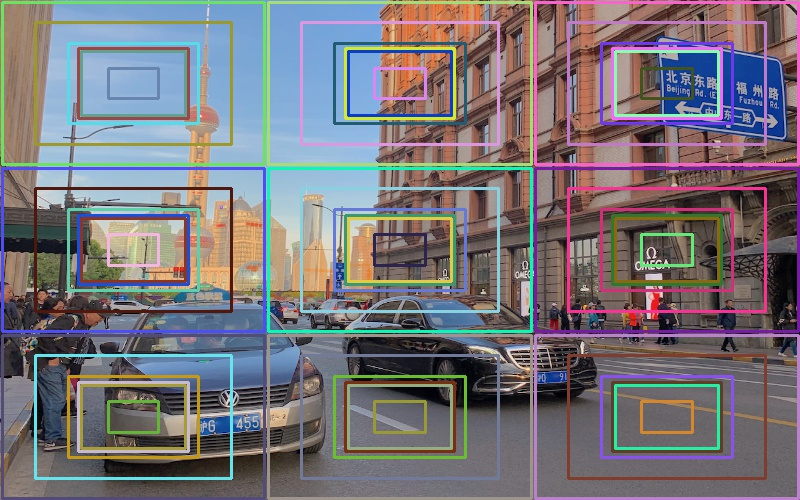

In [29]:
import os
import sys
import cv2
import numpy as np
import IPython

#-------------------------------------------------------------------
def imshow(img):
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
    
#-------------------------------------------------------------------
def grid_boxes(n,m,width,height):
    h = width/n
    v = height/m
    boxes = []
    for i in range(m):
        for j in range(n):
            xmin = h * j   
            ymin = v * i
            xmax = h *(j+1)
            ymax = v *(i+1)
            box = [int(xmin),int(ymin),int(xmax),int(ymax)]
            boxes.append(box)
    return boxes

#-------------------------------------------------------------------
def random_boxes(numbers,width,height):
    boxes = []
    for i in range(numbers):
        xmin = np.random.randint(width)  
        ymin = np.random.randint(height)
        xmax = xmin + np.random.randint(100)*i
        ymax = ymin + np.random.randint(50)*2*i
        if xmax <= width and ymax <= height:
            box = [xmin,ymin,xmax,ymax]
            boxes.append(box)
    return boxes

#-------------------------------------------------------------------
def draw_boxes(boxes,img):
    for box in boxes:
        b = np.random.randint(10,255)
        g = np.random.randint(10,255)
        r = np.random.randint(10,255)
        img = cv2.rectangle(img,(box[0]+2,box[1]+2),(box[2]-2,box[3]-2),(b,g,r),2)
    return img

def scaling(boxes):
    scales = [1.0/8, 1.0/4, 0.3, 0.7, 0.4]
    boxes1 = []
    for box in boxes:
        boxes1.append(box)
        for s in scales:
            w = int((box[2] - box[0])*s)
            h = int((box[3] - box[1])*s)

            b =  [box[0] + w,
                  box[1] + h,
                  box[2] - w,
                  box[3] - h]
            boxes1.append(b)
        
    return boxes1

#-------------------------------------------------------------------
width = 800
height= 500
filename = "images/shanghai.jpg"
img = cv2.imread(filename)
img = cv2.resize(img,(width,height))
boxes = random_boxes(100,width,height)
boxes = grid_boxes(3,3,width, height)

boxes = scaling(boxes)
img   = draw_boxes(boxes,img)
imshow(img)

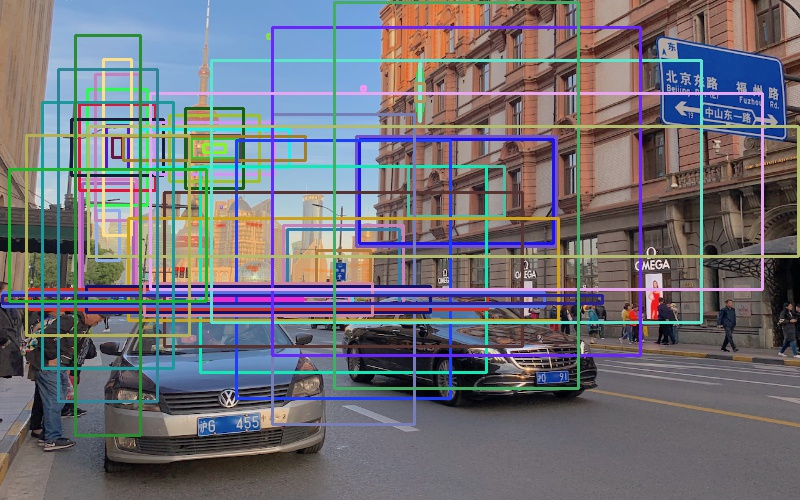

In [47]:
import os
import sys
import cv2
import numpy as np
import IPython

#-------------------------------------------------------------------
def imshow(img):
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
    
#-------------------------------------------------------------------
def grid_boxes(n,m,width,height):
    h = width/n
    v = height/m
    boxes = []
    for i in range(m):
        for j in range(n):
            xmin = h * j   
            ymin = v * i
            xmax = h *(j+1)
            ymax = v *(i+1)
            box = [int(xmin),int(ymin),int(xmax),int(ymax)]
            boxes.append(box)
    return boxes

#-------------------------------------------------------------------
def random_boxes(numbers,width,height):
    boxes = []
    for i in range(numbers):
        xmin = np.random.randint(width)  
        ymin = np.random.randint(height)
        xmax = xmin + np.random.randint(100)*i
        ymax = ymin + np.random.randint(50)*2*i
        if xmax <= width and ymax <= height:
            box = [xmin,ymin,xmax,ymax]
            boxes.append(box)
    return boxes

#-------------------------------------------------------------------
def draw_boxes(boxes,img):
    for box in boxes:
        b = np.random.randint(10,255)
        g = np.random.randint(10,255)
        r = np.random.randint(10,255)
        img = cv2.rectangle(img,(box[0]+2,box[1]+2),(box[2]-2,box[3]-2),(b,g,r),2)
    return img

def scaling(boxes):
    scales = [1.0/8, 1.0/4, 0.3, 0.7, 0.4]
    boxes1 = []
    for box in boxes:
        boxes1.append(box)
        for s in scales:
            w = int((box[2] - box[0])*s)
            h = int((box[3] - box[1])*s)

            b =  [box[0] + w,
                  box[1] + h,
                  box[2] - w,
                  box[3] - h]
            boxes1.append(b)
        
    return boxes1

def aspect_ratio(boxes,width,height):
    scales = [1.0/8, 1.0/4]
    boxes1 = []
    for box in boxes:
        boxes1.append(box)
        for s in scales:
            w = int((box[2] - box[0])*s)
            h = int((box[3] - box[1])*s)
            
            X1 = max(box[0] + w, 0)
            Y1 = max(box[1] - h, 0)
            X2 = min(box[2] - w, width)
            Y2 = min(box[3] + h, height)
            
            b = [X1,Y1,X2,Y2]
            
            x1 = max(box[0] - w, 0)
            y1 = max(box[1] + h, 0)
            x2 = min(box[2] + w, width)
            y2 = min(box[3] - h, height)
            
            b1 = [x1,y1,x2,y2]

            boxes1.append(b)
            boxes1.append(b1)
        
    return boxes1

#-------------------------------------------------------------------
width = 800
height= 500
filename = "images/shanghai.jpg"
img = cv2.imread(filename)
img = cv2.resize(img,(width,height))
boxes = random_boxes(100,width,height)
# boxes = grid_boxes(3,3,width, height)
boxes1 = scaling(boxes)
boxes2 = aspect_ratio(boxes,width,height)
boxes  = boxes1 + boxes2

img   = draw_boxes(boxes,img)
imshow(img)

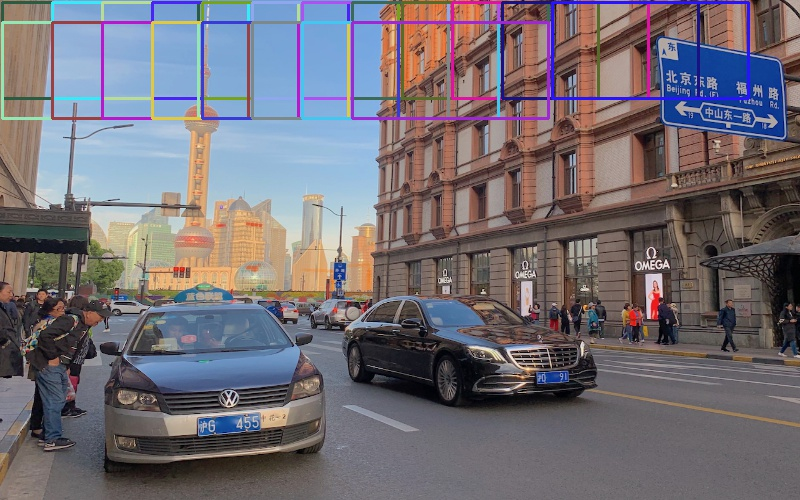

In [69]:
import os
import sys
import cv2
import numpy as np
import IPython

#-------------------------------------------------------------------
def imshow(img):
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
    
#-------------------------------------------------------------------
def sliding(img,w,h,stride_w,stride_h):
    boxes = []
    width = img.shape[1]
    height= img.shape[0]

    for i in range(0,height-h,stride_h):
        for j in range(0,width-w,stride_w):
            xmin = j   
            ymin = i
            xmax = w + j
            ymax = h + i
            box = [int(xmin),int(ymin),int(xmax),int(ymax)]
            boxes.append(box)
    return boxes

#-------------------------------------------------------------------
def random_boxes(numbers,width,height):
    boxes = []
    for i in range(numbers):
        xmin = np.random.randint(width)  
        ymin = np.random.randint(height)
        xmax = xmin + np.random.randint(100)*i
        ymax = ymin + np.random.randint(50)*2*i
        if xmax <= width and ymax <= height:
            box = [xmin,ymin,xmax,ymax]
            boxes.append(box)
    return boxes

#-------------------------------------------------------------------
def draw_boxes(boxes,img):
    for box in boxes:
        b = np.random.randint(10,255)
        g = np.random.randint(10,255)
        r = np.random.randint(10,255)
        img = cv2.rectangle(img,(box[0]+2,box[1]+2),(box[2]-2,box[3]-2),(b,g,r),2)
    return img

def scaling(boxes):
    scales = [1.0/8, 1.0/4, 0.3, 0.7, 0.4]
    boxes1 = []
    for box in boxes:
        boxes1.append(box)
        for s in scales:
            w = int((box[2] - box[0])*s)
            h = int((box[3] - box[1])*s)

            b =  [box[0] + w,
                  box[1] + h,
                  box[2] - w,
                  box[3] - h]
            boxes1.append(b)
        
    return boxes1

def aspect_ratio(boxes,width,height):
    scales = [1.0/8, 1.0/4]
    boxes1 = []
    for box in boxes:
        boxes1.append(box)
        for s in scales:
            w = int((box[2] - box[0])*s)
            h = int((box[3] - box[1])*s)
            
            X1 = max(box[0] + w, 0)
            Y1 = max(box[1] - h, 0)
            X2 = min(box[2] - w, width)
            Y2 = min(box[3] + h, height)
            
            b = [X1,Y1,X2,Y2]
            
            x1 = max(box[0] - w, 0)
            y1 = max(box[1] + h, 0)
            x2 = min(box[2] + w, width)
            y2 = min(box[3] - h, height)
            
            b1 = [x1,y1,x2,y2]

            boxes1.append(b)
            boxes1.append(b1)
        
    return boxes1

#-------------------------------------------------------------------
width = 800
height= 500
filename = "images/shanghai.jpg"
img = cv2.imread(filename)
img = cv2.resize(img,(width,height))
# boxes = random_boxes(100,width,height)
boxes = sliding(img,200,100,50,20)
# boxes1 = scaling(boxes)
# boxes2 = aspect_ratio(boxes,width,height)
# boxes  = boxes1 + boxes2

img   = draw_boxes(boxes[:20],img)
imshow(img)